# RBG <-> HSV Conversions

The task is to manually implement the conversion algorithms between **RGB (Red, Green, Blue)** and **HSV (Hue, Saturation, Value)** colour spaces. These conversions are fundamental to many image processing tasks, as they allow for easier manipulation of image colours, such as adjusting brightness, saturation, and hue, which are intuitive for human perception.

Once the manual conversion logic is written, it will be compared to the **OpenCV** utility functions to ensure correctness.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Input image

(np.float64(-0.5), np.float64(2113.5), np.float64(3170.5), np.float64(-0.5))

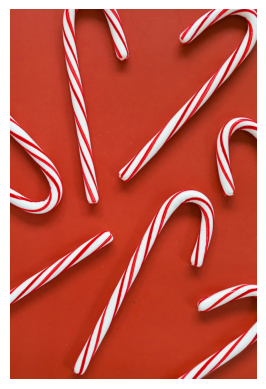

In [8]:
img = cv2.imread("./input/input1.jpg")
plt.imshow(img[:, :, ::-1])
plt.axis("off")

## Conversions using OpenCV utils

(np.float64(-0.5), np.float64(2113.5), np.float64(3170.5), np.float64(-0.5))

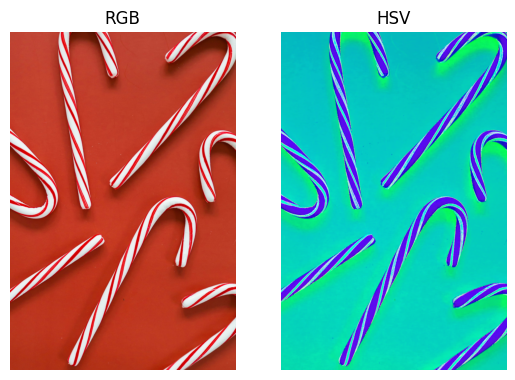

In [9]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Display the RGB and HSV images side by side.
plt.subplot(1, 2, 1)
plt.imshow(imgRGB)
plt.title("RGB")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imgHSV)
plt.title("HSV")
plt.axis("off")

Text(0.5, 1.0, 'Blue Channel')

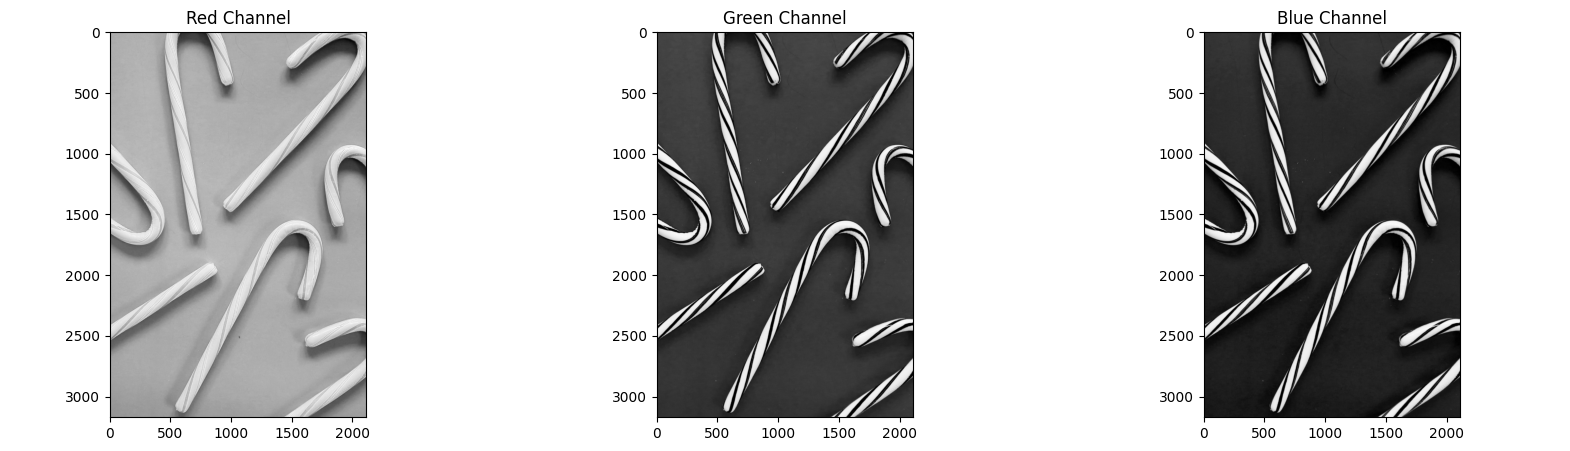

In [16]:
# View each channel in the RGB image
plt.figure(figsize=[20, 5])
plt.axis("off")

plt.subplot(131)
plt.imshow(imgRGB[:, :, 0])
plt.title("Red Channel")
plt.subplot(132)
plt.imshow(imgRGB[:, :, 1])
plt.title("Green Channel")
plt.subplot(133)
plt.imshow(imgRGB[:, :, 2])
plt.title("Blue Channel")

Text(0.5, 1.0, 'Value Channel')

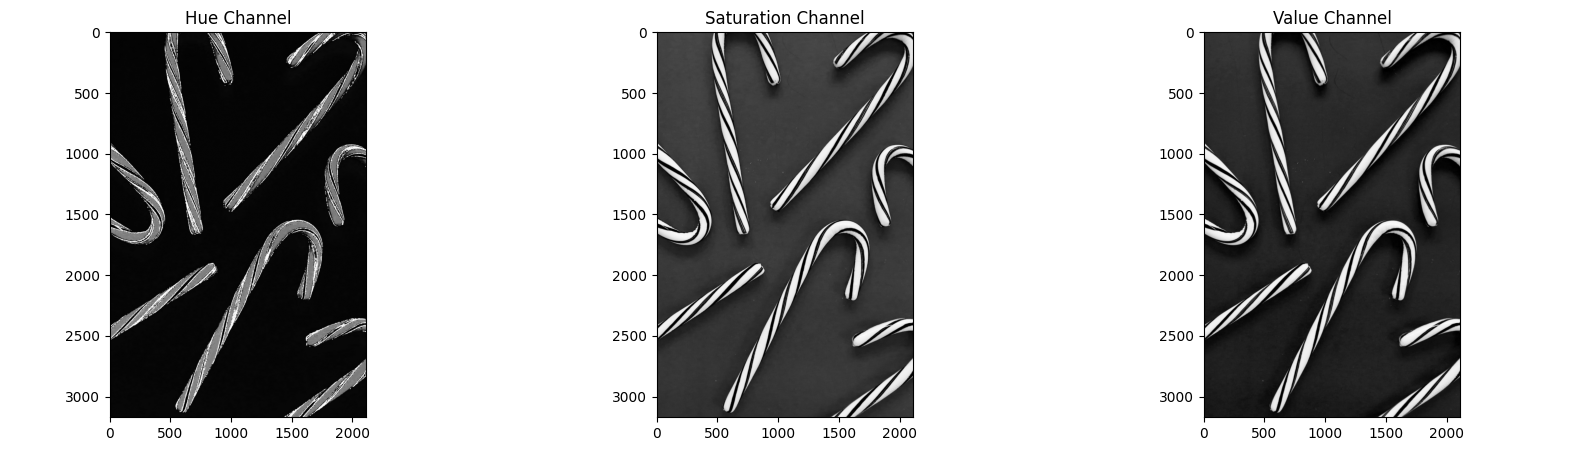

In [17]:
# View each channel in the HSV image
plt.figure(figsize=[20, 5])
plt.axis("off")

plt.subplot(131)
plt.imshow(imgHSV[:, :, 0])
plt.title("Hue Channel")
plt.subplot(132)
plt.imshow(imgRGB[:, :, 1])
plt.title("Saturation Channel")
plt.subplot(133)
plt.imshow(imgRGB[:, :, 2])
plt.title("Value Channel")

## RGB to HSV Formula

This is the formula suggested by OpenCV to convert from RGB colour space to HSV. 

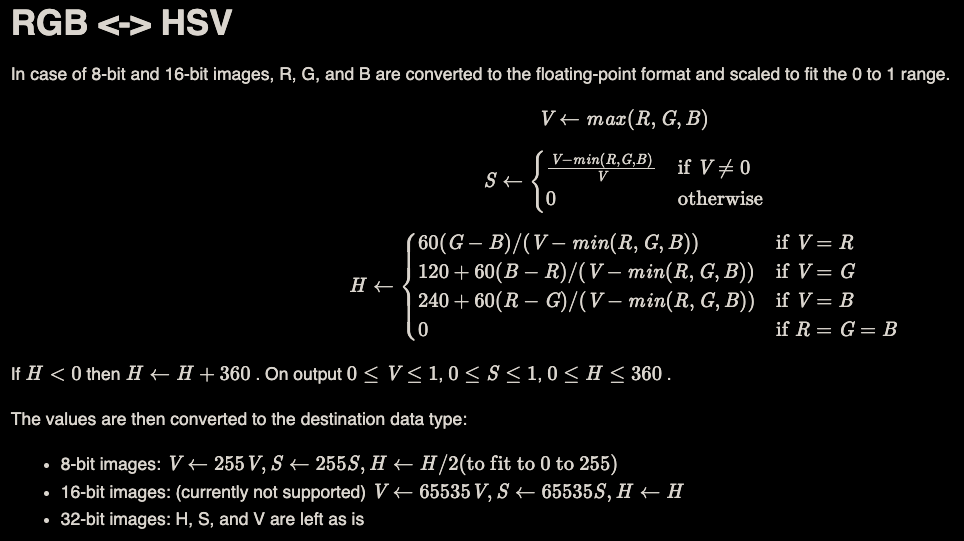

Source: https://docs.opencv.org/4.x/de/d25/imgproc_color_conversions.html

In [ ]:
def rgbToHSV(input):
    """
    rgbToHSV convert an RGB input image into a HSV image.

    Input - RGB Image
    Output = HSV Image
    """
    red, green, blue = np.float32(cv2.split(input)) / 255
    # red = input[0]
    # green = input[1]
    # blue = input[2]

    value = np.maximum(red, np.maximum(green, blue))

    delta = value - np.minimum(red, np.minimum(green, blue))
    saturation = np.zeros_like(value)
    saturation[value != 0] = delta[value != 0] / value[value != 0]

    hue = np.zeros_like(value)
    # hue[red == green and red == blue] = 0

    hue[value != 0] = np.where(
        value[value != 0] == red[value != 0],
        (60 * (green[value != 0] - blue[value != 0]) / delta[value != 0]),
        hue[value != 0],
    )

    hue[value != 0] = np.where(
        value[value != 0] == green[value != 0],
        120 + ((60 * (blue[value != 0] - red[value != 0]) / delta[value != 0])),
        hue[value != 0],
    )

    hue[value != 0] = np.where(
        value[value != 0] == blue[value != 0],
        250 + ((60 * (red[value != 0] - green[value != 0]) / delta[value != 0])),
        hue[value != 0],
    )

    hue[hue < 0] = hue[hue < 0] + 360

    value = np.round(255 * value).astype("int")
    saturation = np.round(255 * saturation).astype("int")
    hue = np.round(hue / 2).astype("int")

    return np.uint8(cv2.merge([hue, saturation, value]))

(np.float64(-0.5), np.float64(2113.5), np.float64(3170.5), np.float64(-0.5))

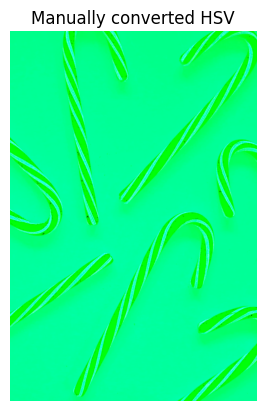

In [35]:
outputHSV = rgbToHSV(imgRGB)
plt.imshow(outputHSV)
plt.title("Manually converted HSV")
plt.axis("off")